In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [28]:
train_df = pd.read_csv("C:/Users/AK/Desktop/train.csv")
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [31]:
train_df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


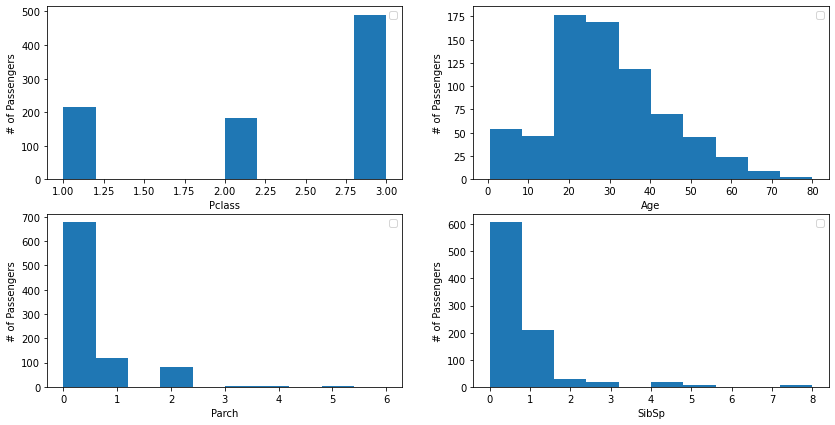

In [34]:
# Figure 1: Distribution of continuous features of all_data
plt.figure(figsize=[14,7])
num_columns = ['Pclass','Age','Parch','SibSp']

for i in range(len(num_columns)):
    cur_subplot = 221 + i
    cur_feature = num_columns[i]
    plt.subplot(cur_subplot)
    plt.hist(x = train_df[cur_feature])
#     plt.title(cur_feature + ' Histogram by Survival')
    plt.xlabel(cur_feature)
    plt.ylabel('# of Passengers')
    plt.legend()

In [35]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
train_df = train_df.drop(columns='Cabin', axis=1, inplace = False)

In [37]:
train_df['Embarked'].fillna('S',inplace=True)

In [38]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace= True)

In [39]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [41]:
train_df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [42]:
train_df.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0


In [43]:
train_df.drop(columns= ['PassengerId','Name', 'Ticket', 'Survived','Pclass','Sex','Embarked'], axis = 1)


,Age,SibSp,Parch,Fare
0,22.000000,1,0,7.2500
1,38.000000,1,0,71.2833
2,26.000000,0,0,7.9250
3,35.000000,1,0,53.1000
4,35.000000,0,0,8.0500
...,...,...,...,...
886,27.000000,0,0,13.0000
887,19.000000,0,0,30.0000
888,29.699118,1,2,23.4500
889,26.000000,0,0,30.0000


In [53]:
X = train_df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = train_df['Survived']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X,Y, test_size=0.20, random_state=42)


In [55]:
model = LogisticRegression()

In [58]:
model.fit(X_train, Y_train)

NameError: name 'Y_train' is not defined

NameError: name 'train' is not defined

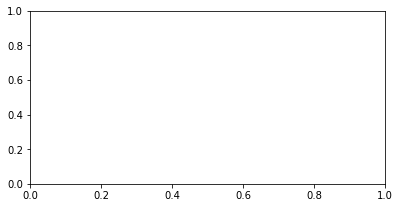

In [62]:
# Figure 3: Distribution / relation of continuous features with Survived
num_columns = ['Fare','Age','Parch','SibSp']
plt.figure(figsize=[14,7])
for i in range(len(num_columns)):
    cur_subplot = 221 + i
    cur_feature = num_columns[i]
    plt.subplot(cur_subplot)
    plt.hist(x = [train[train['Survived']==0][cur_feature], train[train['Survived']==1][cur_feature]], 
             stacked=False,label = ['Dead','Survived'])
    plt.xlabel(cur_feature)
    plt.ylabel('# of Passengers')
    plt.legend()

AttributeError: 'DataFrame' object has no attribute 'train_test'

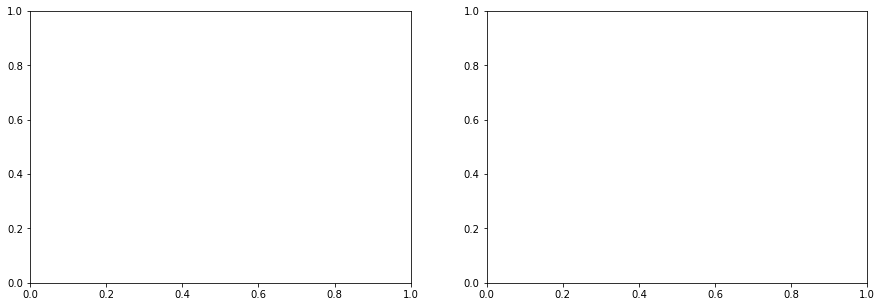

In [60]:
# Figure 3: left: number of survived/not survived passengers in each Cabin
# right: percentage of survived/not survived in each Cabin
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
train_temp = train_df[train_df.train_test == 1] 
_ = train_temp.groupby(['Cabin_initial', 'Survived']).PassengerId.count().unstack(fill_value=0).plot.bar(ax = axes[0])

_ = (train_temp.groupby(['Cabin_initial', 'Survived']).PassengerId.count()/ 
     train_temp.groupby(['Cabin_initial']).PassengerId.count()).unstack(fill_value=0).plot.bar(ax = axes[1])